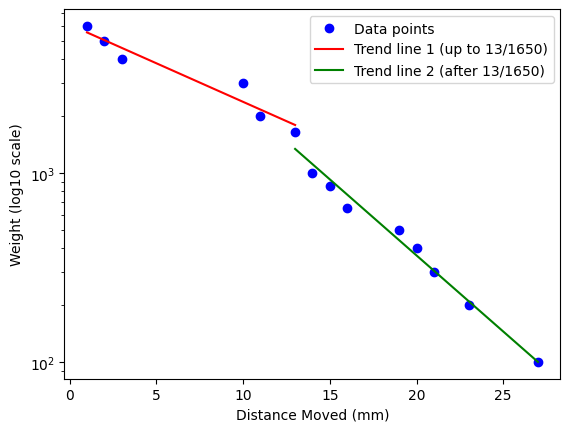

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the user
distance_moved = np.array([1, 2, 3, 10, 11, 13, 14, 15, 16, 19, 20, 21, 23, 27])
weight = np.array([6000, 5000, 4000, 3000, 2000, 1650, 1000, 850, 650, 500, 400, 300, 200, 100])

# Split the data for trend lines
# First trend up to 13/1650
x1 = distance_moved[:6]
y1 = weight[:6]

# Second trend after 13/1650
x2 = distance_moved[5:]
y2 = weight[5:]

# Create the plot
fig, ax = plt.subplots()

# Plot data points
ax.plot(distance_moved, weight, 'bo', label='Data points')

# Plot first trend line
coeffs1 = np.polyfit(x1, np.log10(y1), 1)  # Fit a line in log scale
trend_line1 = 10**(coeffs1[1] + coeffs1[0] * x1)
ax.plot(x1, trend_line1, 'r-', label='Trend line 1 (up to 13/1650)')

# Plot second trend line
coeffs2 = np.polyfit(x2, np.log10(y2), 1)
trend_line2 = 10**(coeffs2[1] + coeffs2[0] * x2)
ax.plot(x2, trend_line2, 'g-', label='Trend line 2 (after 13/1650)')

# Set log scale on the y-axis
ax.set_yscale('log')

# Labeling the axes
ax.set_xlabel('Distance Moved (mm)')
ax.set_ylabel('Weight (log10 scale)')

# Add a legend
ax.legend()

# Show the plot
plt.show()


In [12]:
# Distance for which we want to predict the weight
x_pred = 4

# Use the first trend line coefficients to predict log10(weight)
y_pred_log = coeffs1[0] * x_pred + coeffs1[1]

# Convert from log10 scale to linear weight
y_pred = 10**y_pred_log

y_pred


4181.545338092891

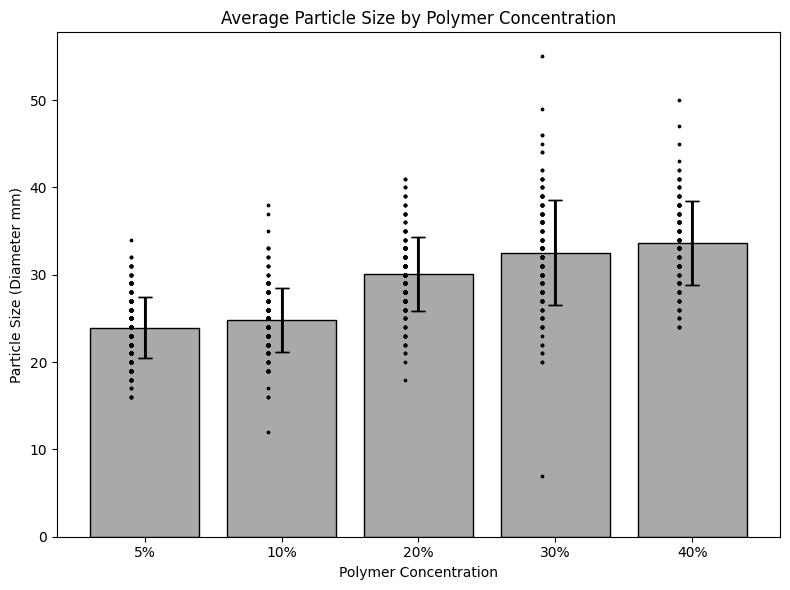

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
file_path = '/Users/sadiqkhawaja/Desktop/Data- polymer concentration.csv'
data = pd.read_csv(file_path)

# Clean the data by removing the first row and renaming columns
data_clean = data.drop(index=0)
data_clean.columns = ['Particle No.', '5%', '10%', '20%', '30%', '40%']
data_clean = data_clean.drop(columns=['Particle No.']).astype(float)

# Calculate the average particle size and standard deviation for each concentration
average_sizes = data_clean.mean()
std_dev = data_clean.std()

# Create a bar chart with dark grey bars and standard deviation error bars
plt.figure(figsize=(8, 6))

# Plotting the bars without 'elinewidth'
bars = plt.bar(average_sizes.index, average_sizes.values, yerr=std_dev.values, 
               capsize=5, color='darkgrey', edgecolor='black')

# Add error bars with thicker lines using plt.errorbar
plt.errorbar(average_sizes.index, average_sizes.values, yerr=std_dev.values, 
             fmt='none', ecolor='black', elinewidth=2, capsize=5)

# Scatter points for each concentration with a constant negative offset
offset = -0.1  # Adjust this value to control how far left the points shift

for i, col in enumerate(data_clean.columns):
    plt.scatter(np.full(len(data_clean[col]), i) + offset, data_clean[col], 
                color='black', s=3, zorder=2)

# Adjust x-ticks to show the correct labels
plt.xticks(range(len(data_clean.columns)), data_clean.columns)

plt.title('Average Particle Size by Polymer Concentration')
plt.xlabel('Polymer Concentration')
plt.ylabel('Particle Size (Diameter mm)')
plt.tight_layout()

# Show the plot
plt.show()


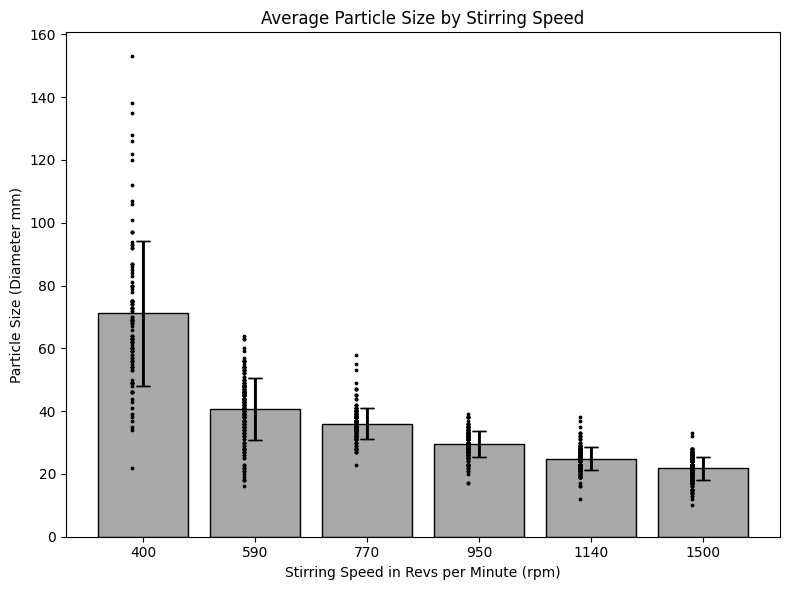

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
file_path = '/Users/sadiqkhawaja/Desktop/KCL/7BBM108/Assessment/Data - Stir speed.csv'
data = pd.read_csv(file_path)

# Assign new column names, ensuring the number matches the data
# Adjust this to match the actual number of columns in your dataset
data.columns = ['400', '590', '770', '950', '1140', '1500']

# Calculate the average particle size and standard deviation for each concentration
average_sizes = data.mean()
std_dev = data.std()

# Create a bar chart with dark grey bars and standard deviation error bars
plt.figure(figsize=(8, 6))

# Plotting the bars without 'elinewidth'
bars = plt.bar(average_sizes.index, average_sizes.values, yerr=std_dev.values, 
               capsize=5, color='darkgrey', edgecolor='black')

# Add error bars with thicker lines using plt.errorbar
plt.errorbar(average_sizes.index, average_sizes.values, yerr=std_dev.values, 
             fmt='none', ecolor='black', elinewidth=2, capsize=5)

# Scatter points for each concentration with a constant negative offset
offset = -0.1  # Adjust this value to control how far left the points shift

for i, col in enumerate(data.columns):
    plt.scatter(np.full(len(data[col]), i) + offset, data[col], 
                color='black', s=3, zorder=2)

# Adjust x-ticks to show the correct labels
plt.xticks(range(len(data.columns)), data.columns)

plt.title('Average Particle Size by Stirring Speed')
plt.xlabel('Stirring Speed in Revs per Minute (rpm)')
plt.ylabel('Particle Size (Diameter mm)')
plt.tight_layout()

# Show the plot
plt.show()


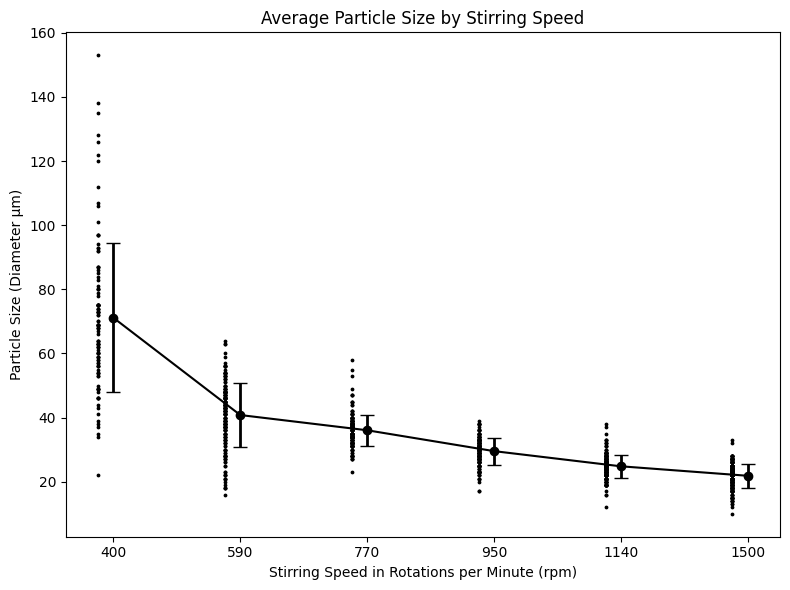

In [15]:
# Recalculate the necessary values
average_sizes = data.mean()
std_dev = data.std()

# Define the offset value
offset = -0.12  # This will shift the scatter points slightly to the left

plt.figure(figsize=(8, 6))

# Plotting the line with error bars
plt.errorbar(average_sizes.index, average_sizes.values, yerr=std_dev.values, 
             fmt='-o', color='black', ecolor='black', elinewidth=2, capsize=5)

# Scatter points for each stirring speed with an offset
for i, col in enumerate(data.columns):
    plt.scatter(np.full(len(data[col]), i) + offset, data[col], 
                color='black', s=3, zorder=2)

# Adjust x-ticks to show the correct labels
plt.xticks(range(len(data.columns)), data.columns)

plt.title('Average Particle Size by Stirring Speed')
plt.xlabel('Stirring Speed in Rotations per Minute (rpm)')
plt.ylabel('Particle Size (Diameter μm)')
plt.tight_layout()

# Show the plot
plt.show()
